# <center>Cat Vs. Dog Classifier with Logistic regression (Part 2)<center>

### Building the parts of our algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Let's see the contents of .hdf5 file.

In [2]:
Load_Data = h5py.File('dataset.h5', "r")
Load_Data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'test_y', 'train_y']>

In [3]:
X_test=np.array(Load_Data.get('X_test')[:])
X_train=np.array(Load_Data.get('X_train')[:])
Y_test=np.array(Load_Data.get('test_y')[:])
Y_train=np.array(Load_Data.get('train_y')[:])
Load_Data.close()

In [4]:
X_test = X_test/255
X_train = X_train/255
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(49152, 113)
(49152, 717)
(113,)
(717,)


### Functions

#### Sigmoid Function

In [5]:
def sigmoid(z):     # Here z can be a scalar or numpy array of any size. 

    s = 1 / (1 + np.exp(-z))   
    
    return s

#### Initializing parameters

In [6]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int)) 
    
    return w, b    

#### Propagate

In [7]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid((np.dot(w.T,X) + b))                                       # compute activation
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))  # compute cost
    
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1 / m *(np.dot(X,(A - Y).T))
    db = 1 / m *(np.sum(A - Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

#### Optimization

In [8]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        
        grads, cost = propagate(w, b, X, Y)
        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

#### Prediction

In [9]:

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid((np.dot(w.T,X)+b))
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
           
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

#### Model Creation

In [10]:

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = True):
   
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [11]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2500, learning_rate = 1.5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.611589
Cost after iteration 200: 0.602848
Cost after iteration 300: 0.595477
Cost after iteration 400: 0.589124
Cost after iteration 500: 0.583545
Cost after iteration 600: 0.578571
Cost after iteration 700: 0.574080
Cost after iteration 800: 0.569981
Cost after iteration 900: 0.566206
Cost after iteration 1000: 0.562706
Cost after iteration 1100: 0.559440
Cost after iteration 1200: 0.556376
Cost after iteration 1300: 0.553489
Cost after iteration 1400: 0.550758
Cost after iteration 1500: 0.548167
Cost after iteration 1600: 0.545702
Cost after iteration 1700: 0.543349
Cost after iteration 1800: 0.541100
Cost after iteration 1900: 0.538944
Cost after iteration 2000: 0.536874
Cost after iteration 2100: 0.534884
Cost after iteration 2200: 0.532968
Cost after iteration 2300: 0.531119
Cost after iteration 2400: 0.529334
train accuracy: 73.36122733612274 %
test accuracy: 61.06194690265487 %


In [14]:
num_px=128 
y_pred=d['Y_prediction_test']

y = 0.0


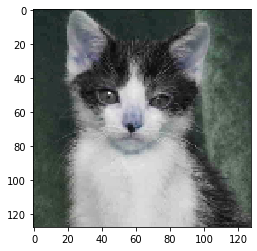

In [18]:
index = 77
plt.imshow(X_test[:,index].reshape((num_px, num_px, 3))*255)
print ("y = " + str(y_pred[0,index]))

In [19]:
import cv2
test_img = cv2.imread('dog.jpg')
test_img = cv2.resize(test_img,(128,128))
test_img = test_img.reshape((1,49152)).T/255
w=d['w']
b=d['b']
print(predict(w,b,test_img))

[[1.]]
